# **Rental Bike Prediction**

In [ ]:
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential

In [ ]:
import sys
sys.path

['/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython']

In [ ]:
print(sys.path)


['/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython']


In [ ]:
import sys
import pprint
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install seaborn
!pip install --upgrade pip


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 16.8 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3


In [ ]:
df = pd.read_csv('hour.csv')


Exploring the head of the dataframe just to see some columns that we would be working with and the values present in them.



In [ ]:
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


It is important to explore the shape of the data to understand the rows and columns present in the data.



In [ ]:
df.shape


(17379, 17)

It would be better to understand the data and check how the values are spread out by understanding the quartiles and the minimum value and maximum value respectively. Below, we would be looking at different numerical features and see how the features are spread.

In [ ]:
df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


We would check the null and non-null values just to ensure that we get a good understanding of the data along with their data types.



In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
# We are trying to access the days in the date column as can be seen below. We would store it in day column 
df['day']= df['dteday'].apply(lambda x: x[8:])

In [ ]:
df['day']


0        01
1        01
2        01
3        01
4        01
         ..
17374    31
17375    31
17376    31
17377    31
17378    31
Name: day, Length: 17379, dtype: object

In [ ]:
df['day'].unique()



array(['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31'], dtype=object)

In [ ]:
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,01
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,01
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,01
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,01
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,01


Looking at the different unique seasons to understand the data.



In [ ]:
print("The different unique numerical values present in Season feature are: {}".format(df['season'].unique()))


The different unique numerical values present in Season feature are: [1 2 3 4]


The different unique numerical values present in Season feature are: [1 2 3 4]


In [ ]:
season_dict = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}


In [ ]:
season_dict


{1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}

In [ ]:
df['Season_cat'] = df['season'].map(season_dict)


In [ ]:
df['Season_cat']


0        Spring
1        Spring
2        Spring
3        Spring
4        Spring
          ...  
17374    Spring
17375    Spring
17376    Spring
17377    Spring
17378    Spring
Name: Season_cat, Length: 17379, dtype: object

In [ ]:
df['Season_cat'].unique()


array(['Spring', 'Summer', 'Fall', 'Winter'], dtype=object)

# **2.1 Different Season Plots**
We'll illustrate the demand for bikes in this section for each season. To gain a more comprehensive perspective, we will additionally consider and count the total data points for the various seasons. Understanding how much demand there is for motorcycles during various seasons might be crucial because of how closely this characteristic relates to the desire for certain bikes. This can also be seen in the actual world, where we witness more people riding bikes in one or more seasons than in others. As a result, taking this attribute into account would help us better comprehend its significance and the degree to which it would affect our machine learning predictions.

## **2.1.1 Countplot of Different Seasons**
We see below the count of different seasons and can understand that there are slightly more fall season values compared to the other seasons. That is because of the variation in the number of days present every month. Therefore, we can get a good idea about the demand of bikes based on the seasonal data respectively.

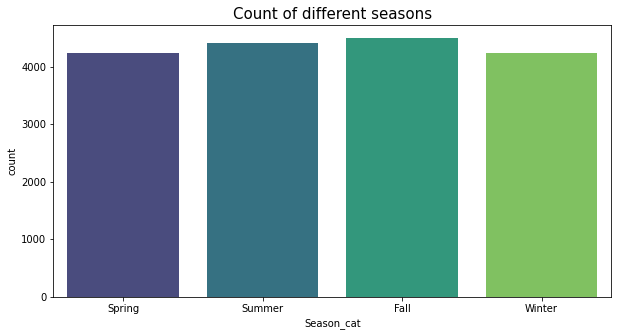

In [ ]:
plt.figure(figsize = (10, 5))
sns.countplot(data = df, x = 'Season_cat', palette = 'viridis', saturation = 0.75)
plt.title("Count of different seasons", color = 'black', fontsize = 15)
plt.show()

In [ ]:
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,Season_cat
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,01,Spring
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,01,Spring
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,01,Spring
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,01,Spring
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,01,Spring


### **2.1.2 Plot for Average Demand for Bikes during Different Seasons**
According to the information below, the fall season has a higher demand for bikes than the other seasons do. Additionally, it has been found that demand for motorcycles is lowest 

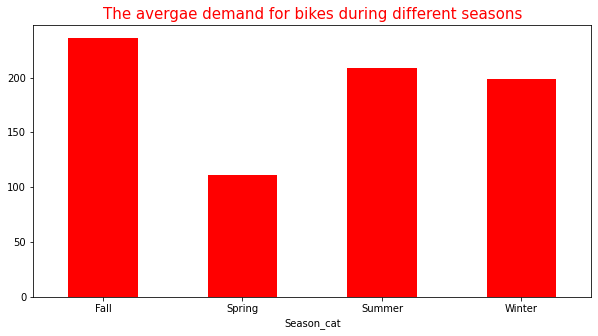

In [ ]:
plt.figure(figsize = (10, 5))
df.groupby(['Season_cat']).mean()['cnt'].plot(kind = 'bar', color = 'red')
plt.xticks(rotation = 0)
plt.title("The avergae demand for bikes during different seasons", fontsize = 15, color = 'red')
plt.show()

### **2.1.3 Total Demand for Bikes for Different Seasons**

We can see from the data below that demand for motorcycles is strongest in the fall. On the other hand, we can also see that the demand for motorcycles is lowest in spring. As a result, we may assume that there will be a high demand for bikes in the fall and a rather low demand for bikes in the spring.


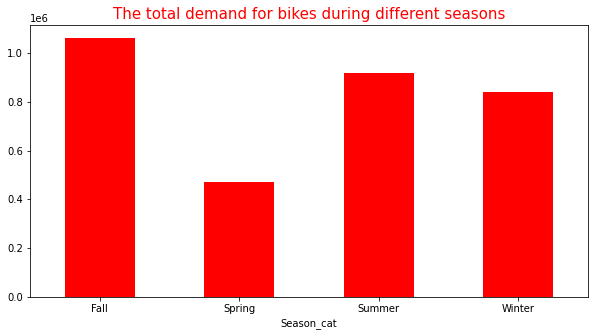

In [ ]:
plt.figure(figsize = (10, 5))
df.groupby(['Season_cat']).sum()['cnt'].plot(kind = 'bar', color = 'red')
plt.xticks(rotation = 0)
plt.title("The total demand for bikes during different seasons", fontsize = 15, color = 'red')
plt.show()

In [ ]:
month_dict = {1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 6: "June", 7: "July",
             8: "August", 9: "September", 10: "October", 11: "November", 12: "December"}
df["Month_cat"] = df['mnth'].map(month_dict)

In [ ]:
df["Month_cat"]


0         January
1         January
2         January
3         January
4         January
           ...   
17374    December
17375    December
17376    December
17377    December
17378    December
Name: Month_cat, Length: 17379, dtype: object

## **2.2 Different Month Plots**

It's time to get more specific now and learn how the demand for motorcycles varies throughout the year. In general, we observe that we don't typically anticipate many bikes, much alone bikes from loan firms, when there is snow or rain in cities. Therefore, taking into account the various months at which there is a demand for bikes would also help us comprehend the significance of this feature in our machine learning analysis.

## **2.2.1 Countplot of Different Months**
The graph below displays the overall values present for several months in turn. As a result, we can infer that some months have fewer days than others, and as a result, their values are somewhat lower than those of the latter.

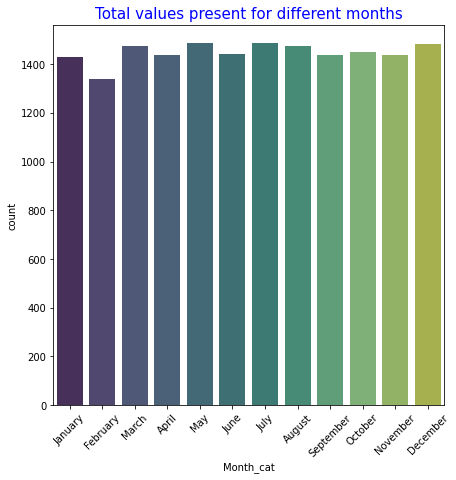

In [ ]:
plt.figure(figsize = (7, 7))
plt.xticks(rotation = 45)
sns.countplot(data = df, x = 'Month_cat', palette = 'viridis', saturation = 0.5) 
plt.title("Total values present for different months", fontsize = 15, color = 'blue')
plt.show()

### **2.2.2 Average Demand for Bikes for Different Months**

Bikes are most in demand in the months of September, June, and August, respectively. As compared to the other months, we can see that some have fairly little demand. We can also notice that demand for motorcycles is at its lowest on average in January. Therefore, since there will be quite a significant demand for bikes in September, action must be done. However, we observe that there is little demand for bikes in the month of January. Therefore, such bikes can be moved to a different area to guarantee that individuals can access them as needed.

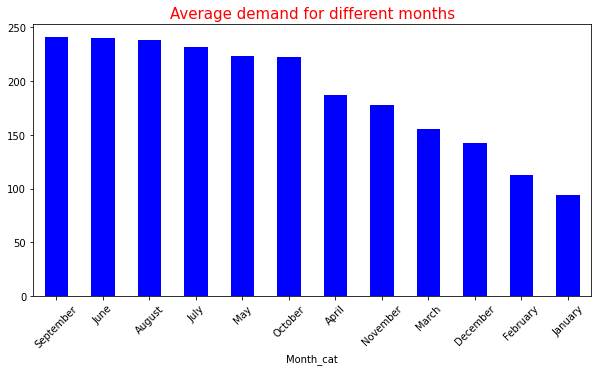

In [ ]:
plt.figure(figsize = (10, 5))
df.groupby(['Month_cat']).mean()['cnt'].sort_values(ascending = False).plot(kind = 'bar', color = 'blue')
plt.xticks(rotation = 45)
plt.title("Average demand for different months", fontsize = 15, color = 'red')
plt.show()

### **2.3 Distribution of Windspeed**

When we examine the distribution of the data, we can see that the majority of the windspeed readings we are dealing with are for lower speeds. There are a number of extreme values present. As a result, the majority of the entries in the dataset have windspeed values that are not particularly high.

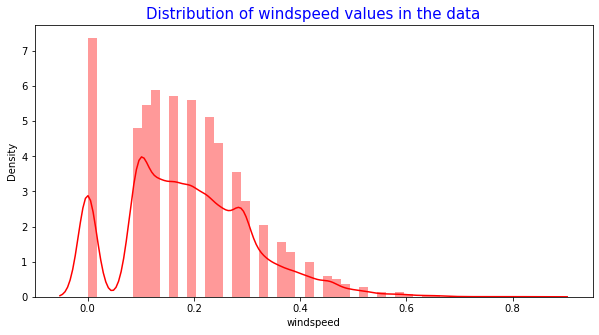

In [ ]:
plt.figure(figsize = (10, 5))
sns.distplot(df['windspeed'], color = 'red')
plt.title("Distribution of windspeed values in the data", fontsize = 15, color = 'blue')
plt.show()

### **2.4 Distribution of Temperature Values**

The distribution of temperature values is fairly even, as can be seen. Because of this, we are using temperature numbers that are rather equally spread. This would guarantee that we receive the demand for various temperature values.

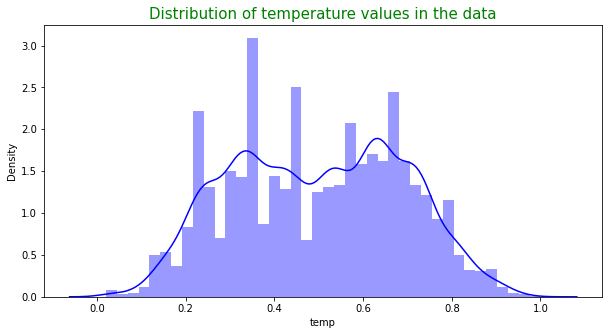

In [ ]:
plt.figure(figsize = (10, 5))
sns.distplot(df['temp'], color = 'blue')
plt.title("Distribution of temperature values in the data", fontsize = 15, color = 'green')
plt.show()

In [ ]:
def temperature_converter(value):
    temp_max = df['temp'].max()
    temp_min = df['temp'].min()
    return (value * (temp_max - temp_min) + temp_min)

In [ ]:
df['Temperature_converted'] = df['temp'].apply(temperature_converter)


In [ ]:
df['Temperature_converted']


0        0.2552
1        0.2356
2        0.2356
3        0.2552
4        0.2552
          ...  
17374    0.2748
17375    0.2748
17376    0.2748
17377    0.2748
17378    0.2748
Name: Temperature_converted, Length: 17379, dtype: float64

### **2.5 Total Demand for Bikes during Different Hours**

The entire demand for bicycles peaks about 5 p.m. Washington time, as can be seen. As can be observed, the demand for bikes in the early morning, from 1 am to 7 am, is quite low. In addition, we can observe that there is a large demand for bikes beginning at 8 am and that the demand rises steadily.

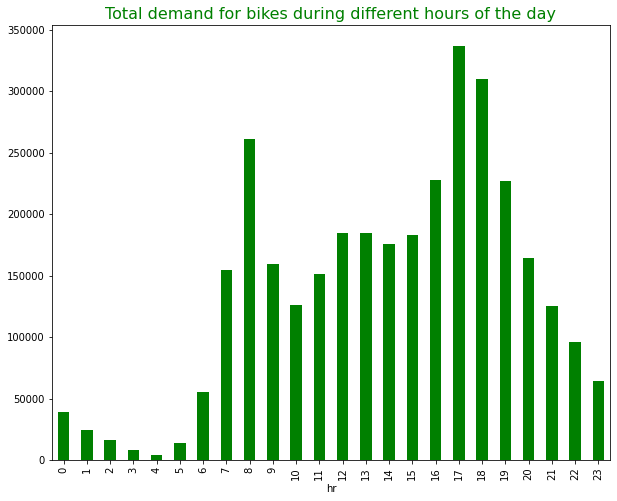

In [ ]:
plt.figure(figsize = (10, 8))
df.groupby(['hr'])['cnt'].sum().plot(kind = 'bar', color = 'green')
plt.title("Total demand for bikes during different hours of the day", fontsize = 16, color = 'green')
plt.show()

### **2.6 Distribution of Humidity values**
We can see that the humidity values are uniformly distributed and are distributed with a good distribution. In the data, there is a significant leftward shift.

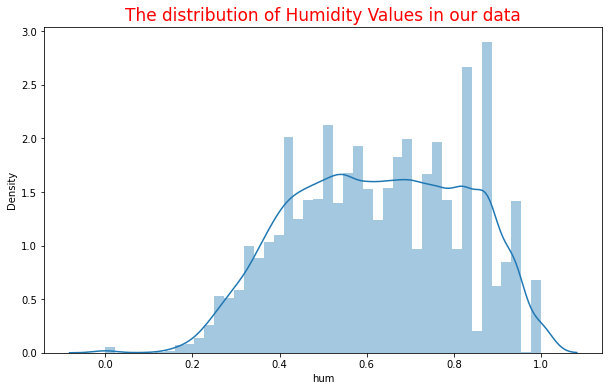

In [ ]:
plt.figure(figsize = (10, 6))
sns.distplot(df['hum'])
plt.title("The distribution of Humidity Values in our data", fontsize = 17, color = 'red')
plt.show()

## **2.7 Scatterplots**

We would have a better understanding of the interdependence of the many features we are taking into account when plotting the graphs if we used scatterplots when performing the exploratory data analysis. A scatterplot displays a plot that incorporates two elements and is based on various data points. It can be inferred that certain features are interdependent or highly correlated if we observe linearity in the data and the points that the scatterplot marks. In contrast, if the scatterplot shows a negative dispersion of the data points, this would indicate a negative correlation or inverse dependency.

### **2.7.1 Scatterplot between Demand and Registered Users**

As can be seen, as the number of people registered increases, there is a very good possibility for the demand for bikes to increase respectively. When the number of registered users are low, we see that the total demand of bikes is due to casual riders. One can infer from this data that as the number of registered users and registered bikes increases, there is a possibility that the demand created is mainly due to registered users. If the registered users are low, we see that the demand is created not just by the registered users but also by casual riders respectively.

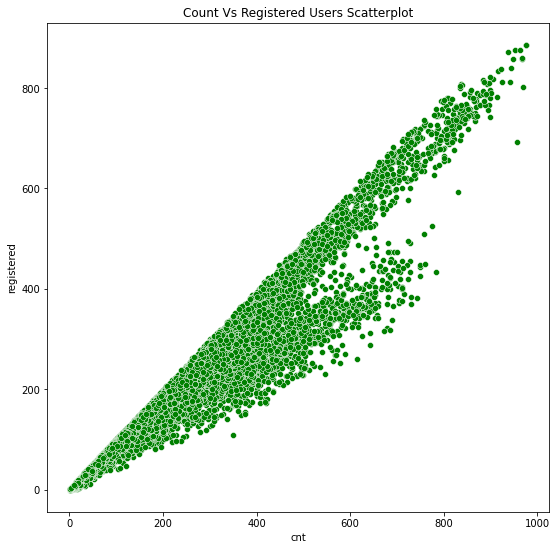

In [ ]:
plt.figure(figsize = (9, 9))
sns.scatterplot(x = 'cnt', y = 'registered', data = df, color = 'green', marker = 'o')
plt.title('Count Vs Registered Users Scatterplot')
plt.show()

In [ ]:
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,day,Season_cat,Month_cat,Temperature_converted
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,01,Spring,January,0.2552
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,01,Spring,January,0.2356
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,01,Spring,January,0.2356
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,01,Spring,January,0.2552
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,01,Spring,January,0.2552


### **2.7.2 Distribution Plot of Casual Riders**

According to the distribution plot, there are only a small number of situations when the riders are in the range of 400, although the frequency of casual riders, who are typically about 50, is larger. As observed in the chart below, there is a right-tailed distribution where a small number of values are concentrated to the right and a dense distribution to the left. From the graph below, it can be deduced that casual motorcyclists who are over 50 are quite uncommon, whereas casual riders who are under 50 are more common.

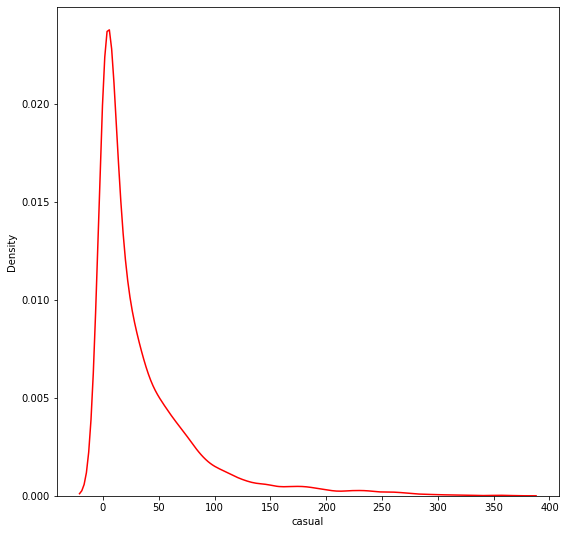

In [ ]:
plt.figure(figsize = (9, 9))
sns.kdeplot(df['casual'], color = 'red')

### **2.7.3 Scatterplot between Casual and Registered**

As can be seen below, there seems to be a linear relationship between casual riders and registered riders. This might not hold true in all the cases. There can be instances where the number of casual riders are more than the number of registered riders and vice-versa.

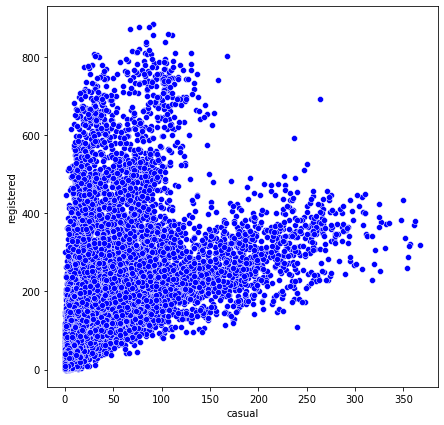

In [ ]:
plt.figure(figsize = (7, 7))
sns.scatterplot(x = 'casual', y = 'registered', color = 'blue', data = df)
plt.show()

Let us now look at all the columns that we would be working with and get an understanding of the data.



In [ ]:
df.columns


Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'day', 'Season_cat', 'Month_cat',
       'Temperature_converted'],
      dtype='object')

In [ ]:
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,day,Season_cat,Month_cat,Temperature_converted
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,01,Spring,January,0.2552
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,01,Spring,January,0.2356
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,01,Spring,January,0.2356
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,01,Spring,January,0.2552
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,01,Spring,January,0.2552


In [ ]:
def temperature_segments(value):
    if value < 0.2:
        return 0.1
    elif value < 0.4 and value > 0.2:
        return 0.3
    elif value < 0.6 and value > 0.4:
        return 0.5
    elif value < 0.7 and value > 0.5:
        return 0.6
    elif value < 0.8 and value > 0.6:
        return 0.7
    elif value < 0.9 and value > 0.7:
        return 0.8
    else:
        return 0.9

We would be working with the temperature segments and divide the temperature values respectively.



In [ ]:
df['Temperature_segments'] = df['temp'].apply(temperature_segments)


## **2.8 Temperature Segments Countplot**
In our data, temperatures might range from exceedingly high to extremely low values. As may be observed, it appears that there aren't many locations with either extremely high or extremely low temperatures.

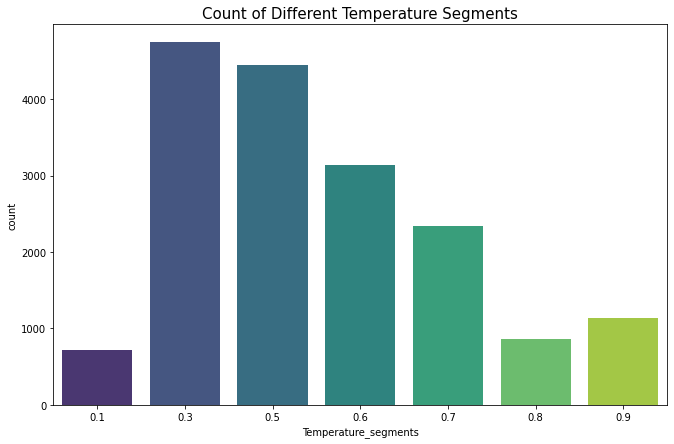

In [ ]:
plt.figure(figsize = (11, 7))
sns.countplot(df['Temperature_segments'], palette = 'viridis')
plt.title("Count of Different Temperature Segments", fontsize = 15, color = 'black')
plt.show()

## **2.9 Average of Temperature Segments**
It's time to examine how temperature affects the desire for bicycles. As seen in the plot below, the temperature segment 0.8 has a better average demand for bikes than the other segments we just established. This could lead us to draw the conclusion that when the temperature values rise, there is a chance that demand for motorcycles will rise as well. There is a catch, though: if it's too hot outside, fewer people will be eager to ride their bikes. As a result, this helped us to grasp how temperature could be one of the determining elements that could be utilized to predict the demand for bikes.

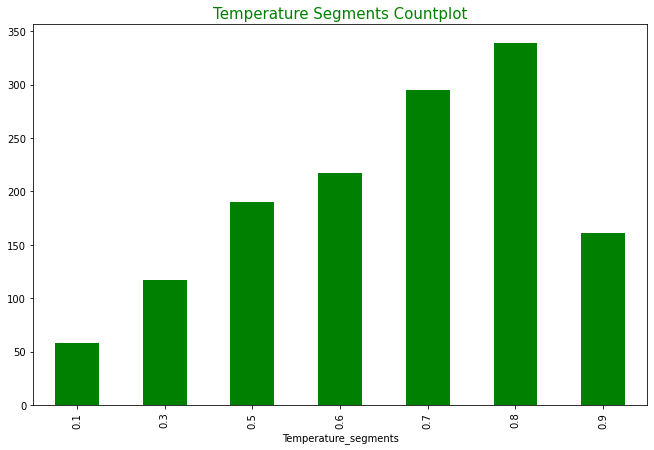

In [ ]:
plt.figure(figsize = (11, 7))
df.groupby(['Temperature_segments']).mean()['cnt'].plot(kind = 'bar', color = 'green')
plt.title("Temperature Segments Countplot", fontsize = 15, color = 'green')
plt.show()

In [ ]:
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,day,Season_cat,Month_cat,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.81,0.0,3,13,16,01,Spring,January,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.80,0.0,8,32,40,01,Spring,January,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.80,0.0,5,27,32,01,Spring,January,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.75,0.0,3,10,13,01,Spring,January,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.75,0.0,0,1,1,01,Spring,January,0.2552,0.3



### **2.9(a) Lineplot for Temperature for Different Months**
The graph below shows that the average monthly temperature is greater in July and relatively low in February because it is springtime throughout those months. As a consequence, we obtain various monthly average temperatures. Using this knowledge, we will examine how the demand for bicycles might alter depending on the various numbers.

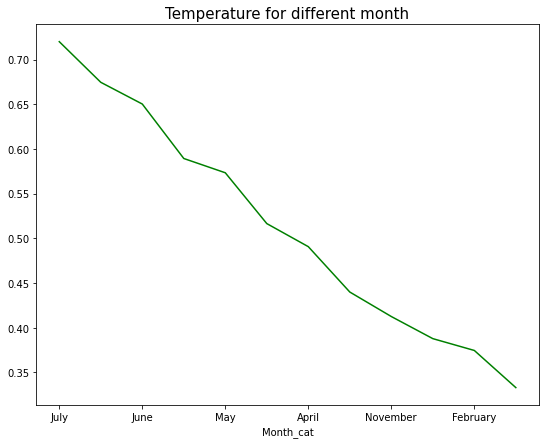

In [ ]:
plt.figure(figsize = (9, 7))
df.groupby(['Month_cat']).mean()['Temperature_segments'].sort_values(ascending = False).plot(kind = 'line', color = 'green')
plt.title("Temperature for different month", color = 'black', fontsize = 15)
plt.show()

### **2.9(b) Scatterplot between Total Demand and Casual Drivers **
The overall number of casual drivers and the demand for motorcycles have a linear relationship, as can be seen in the chart below. The quantity of occasional drivers and the overall demand for motorcycles appear to follow a linear development.

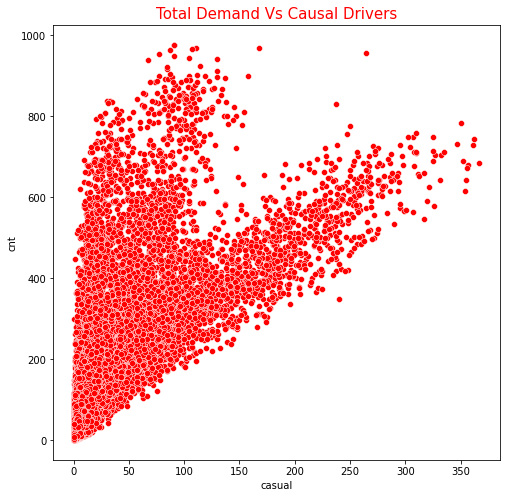

In [ ]:
plt.figure(figsize = (8, 8))
sns.scatterplot(x = 'casual', y = 'cnt', data = df, color = 'red')
plt.title("Total Demand Vs Causal Drivers", fontsize = 15, color = 'red')
plt.show()

### **2.9(c) Average Demand for Bikes for Different Days of the Week**

The values of the average demand for motorcycles are nearly the same with only minor variations, as can be seen in the chart below, suggesting that there is not much of a difference between different days of the week. Since it is difficult for us to tell the variations apart, this feature may not be very helpful in aiding our ability to forecast the overall demand for motorcycles.

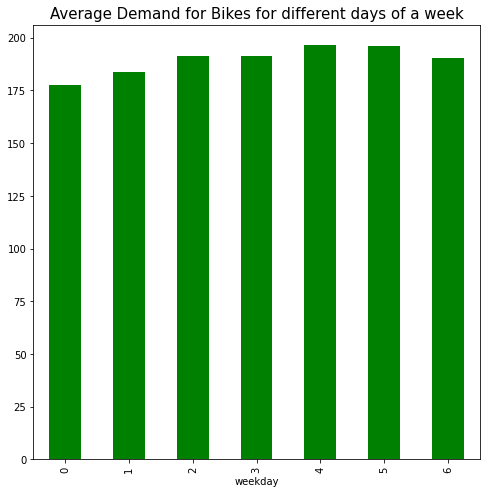

In [ ]:
plt.figure(figsize = (8, 8))
df.groupby(['weekday']).mean()['cnt'].plot(kind = 'bar', color = 'green')
plt.title("Average Demand for Bikes for different days of a week", fontsize = 15, color  = 'black')
plt.show()

We are going to once again look at the data values along with their data types.



In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   instant                17379 non-null  int64  
 1   dteday                 17379 non-null  object 
 2   season                 17379 non-null  int64  
 3   yr                     17379 non-null  int64  
 4   mnth                   17379 non-null  int64  
 5   hr                     17379 non-null  int64  
 6   holiday                17379 non-null  int64  
 7   weekday                17379 non-null  int64  
 8   workingday             17379 non-null  int64  
 9   weathersit             17379 non-null  int64  
 10  temp                   17379 non-null  float64
 11  atemp                  17379 non-null  float64
 12  hum                    17379 non-null  float64
 13  windspeed              17379 non-null  float64
 14  casual                 17379 non-null  int64  
 15  re

In [ ]:
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,hum,windspeed,casual,registered,cnt,day,Season_cat,Month_cat,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.81,0.0,3,13,16,01,Spring,January,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.80,0.0,8,32,40,01,Spring,January,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.80,0.0,5,27,32,01,Spring,January,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.75,0.0,3,10,13,01,Spring,January,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.75,0.0,0,1,1,01,Spring,January,0.2552,0.3


The season categorical variable and the month categorical variable will no longer be used because they are objects rather than integers or floats. Drop is being used in this instance to eliminate the name-containing 

In [ ]:
df.drop(['Season_cat', 'Month_cat'], axis = 1, inplace = True)


In [ ]:
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,01,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,01,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,01,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,01,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,01,0.2552,0.3


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   instant                17379 non-null  int64  
 1   dteday                 17379 non-null  object 
 2   season                 17379 non-null  int64  
 3   yr                     17379 non-null  int64  
 4   mnth                   17379 non-null  int64  
 5   hr                     17379 non-null  int64  
 6   holiday                17379 non-null  int64  
 7   weekday                17379 non-null  int64  
 8   workingday             17379 non-null  int64  
 9   weathersit             17379 non-null  int64  
 10  temp                   17379 non-null  float64
 11  atemp                  17379 non-null  float64
 12  hum                    17379 non-null  float64
 13  windspeed              17379 non-null  float64
 14  casual                 17379 non-null  int64  
 15  re

In [ ]:
df['day'] = df['day'].apply(lambda x: int(x))


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   instant                17379 non-null  int64  
 1   dteday                 17379 non-null  object 
 2   season                 17379 non-null  int64  
 3   yr                     17379 non-null  int64  
 4   mnth                   17379 non-null  int64  
 5   hr                     17379 non-null  int64  
 6   holiday                17379 non-null  int64  
 7   weekday                17379 non-null  int64  
 8   workingday             17379 non-null  int64  
 9   weathersit             17379 non-null  int64  
 10  temp                   17379 non-null  float64
 11  atemp                  17379 non-null  float64
 12  hum                    17379 non-null  float64
 13  windspeed              17379 non-null  float64
 14  casual                 17379 non-null  int64  
 15  re

In [ ]:
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,0.2552,0.3


In [ ]:
df.drop(['casual', 'registered'], axis = 1, inplace = True)


In [ ]:
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,1,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,1,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,1,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,1,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1,0.2552,0.3


In [ ]:
from datetime import datetime


In [ ]:
df['dteday'] = df['dteday'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))


In [ ]:
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,1,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,1,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,1,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,1,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1,0.2552,0.3


In [ ]:
univariate_data_df = df['cnt']
univariate_data_df.index = df['dteday']
univariate_data_df.head()

dteday
2011-01-01    16
2011-01-01    40
2011-01-01    32
2011-01-01    13
2011-01-01     1
Name: cnt, dtype: int64

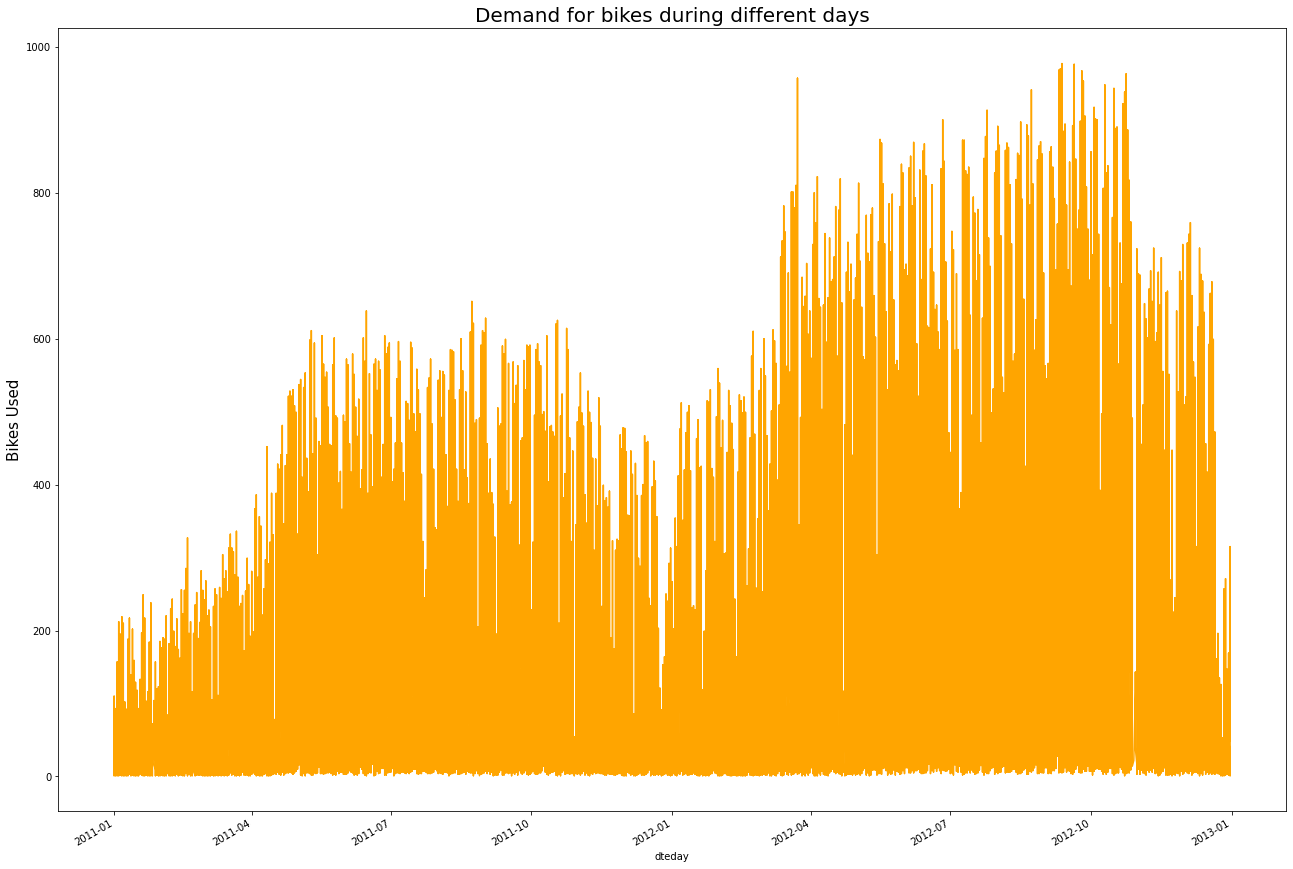

In [ ]:
plt.figure(figsize = (22, 16))
univariate_data_df.plot(color = 'orange')
plt.title('Demand for bikes during different days', fontsize = 20)
plt.ylabel('Bikes Used', fontsize = 15)
plt.show()

In [ ]:
univariate_data_df


dteday
2011-01-01     16
2011-01-01     40
2011-01-01     32
2011-01-01     13
2011-01-01      1
             ... 
2012-12-31    119
2012-12-31     89
2012-12-31     90
2012-12-31     61
2012-12-31     49
Name: cnt, Length: 17379, dtype: int64

In [ ]:
univariate_data_df.head()


dteday
2011-01-01    16
2011-01-01    40
2011-01-01    32
2011-01-01    13
2011-01-01     1
Name: cnt, dtype: int64

In [ ]:
univariate_data_df.values


array([16, 40, 32, ..., 90, 61, 49])

In [ ]:
univariate_data_df.shape


(17379,)

In [ ]:
uni_data = univariate_data_df.values


In [ ]:
uni_data


array([16, 40, 32, ..., 90, 61, 49])

In [ ]:
import tensorflow as tf


In [ ]:
TRAIN_SPLIT = 10000

tf.random.set_seed(101)

uni_train_mean = uni_data[: TRAIN_SPLIT].mean()
uni_train_std = uni_data[: TRAIN_SPLIT].std()

In [ ]:
uni_data = (uni_data - uni_train_mean) / uni_train_std


In [ ]:
uni_data


array([-0.95731558, -0.77662082, -0.83685241, ..., -0.4001734 ,
       -0.6185129 , -0.70886028])

In [ ]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
    data = []
    labels = []
    
    start_index = start_index + history_size
    
    if end_index is None:
        end_index = len(dataset) - target_size
        
    for i in range(start_index, end_index):
        indices = range(i - history_size, i)
        data.append(np.reshape(dataset[indices], (history_size, 1)))
        labels.append(dataset[i + target_size])
    return np.array(data), np.array(labels)

In [ ]:
univariate_past_history = 24
univariate_future_target = 0

In [ ]:
x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT, univariate_past_history, univariate_future_target)

x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None, univariate_past_history, univariate_future_target)

In [ ]:
print(x_train_uni.shape)
print(y_train_uni.shape)
print(x_val_uni.shape)
print(y_val_uni.shape)

(9976, 24, 1)
(9976,)
(7355, 24, 1)
(7355,)


In [ ]:
def create_time_steps(length):
    return (list(range(-length, 0)))

print(create_time_steps(20))

[-20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1]


In [ ]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'bx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    
    if delta: 
        future = delta
    else:
        future = 0
        
    plt.figure(figsize = (20, 10))    
    plt.title(title, fontsize = 20)

    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize = 10, label = labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label = labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])

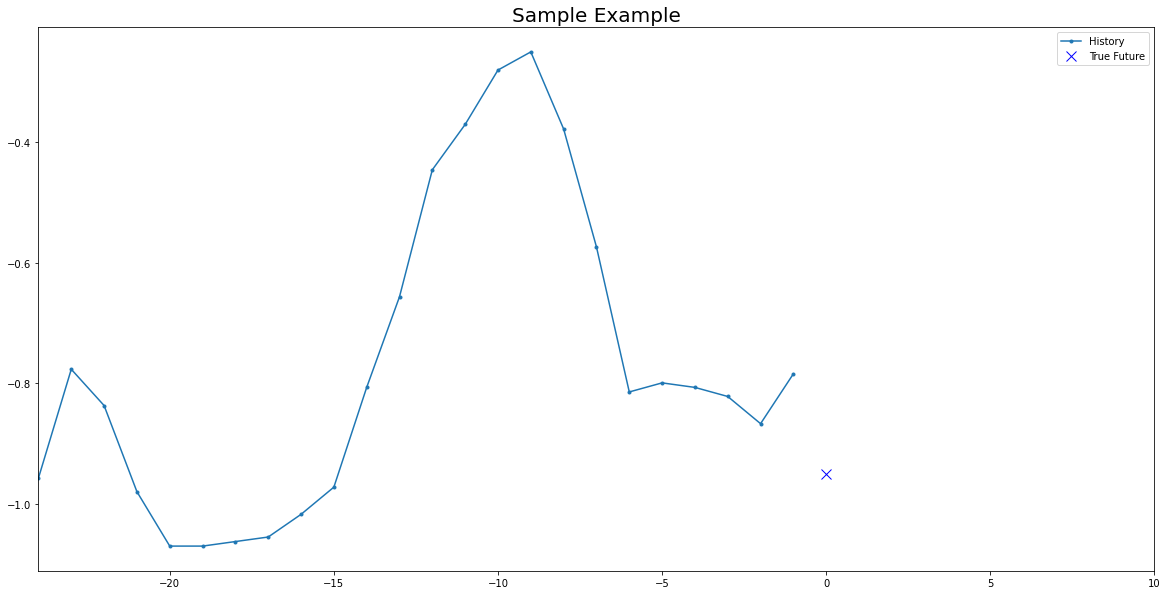

In [ ]:
show_plot([x_train_uni[0], y_train_uni[0]], 0, 'Sample Example')


In [ ]:
def mwa(history):
    return np.mean(history)

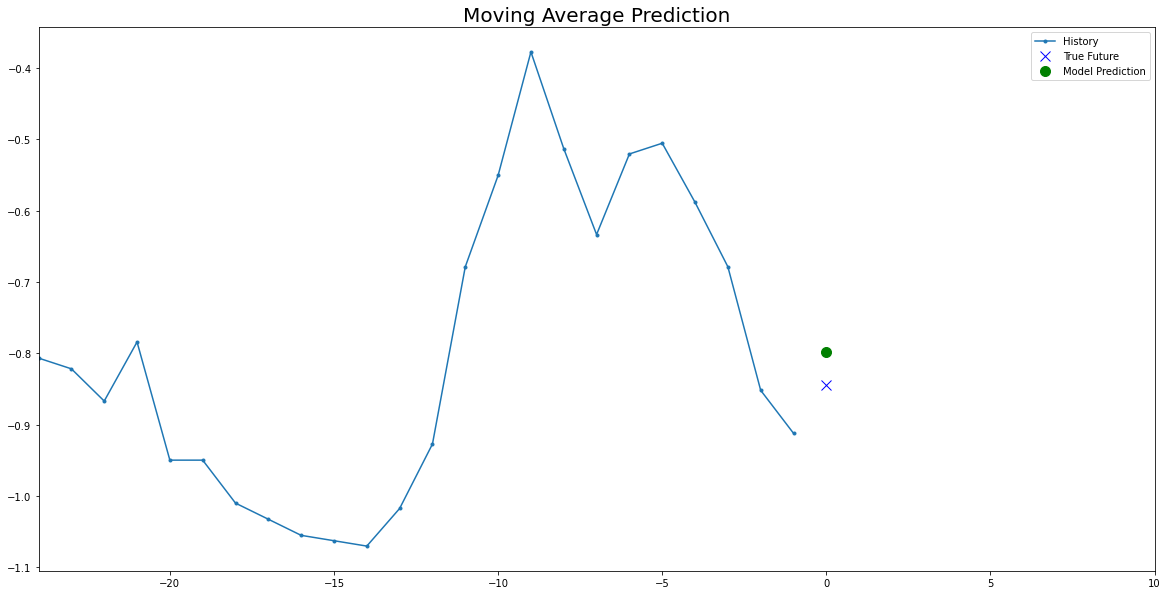

In [ ]:
i = 20
show_plot([x_train_uni[i], y_train_uni[i], mwa(x_train_uni[i])], 0, 'Moving Average Prediction')


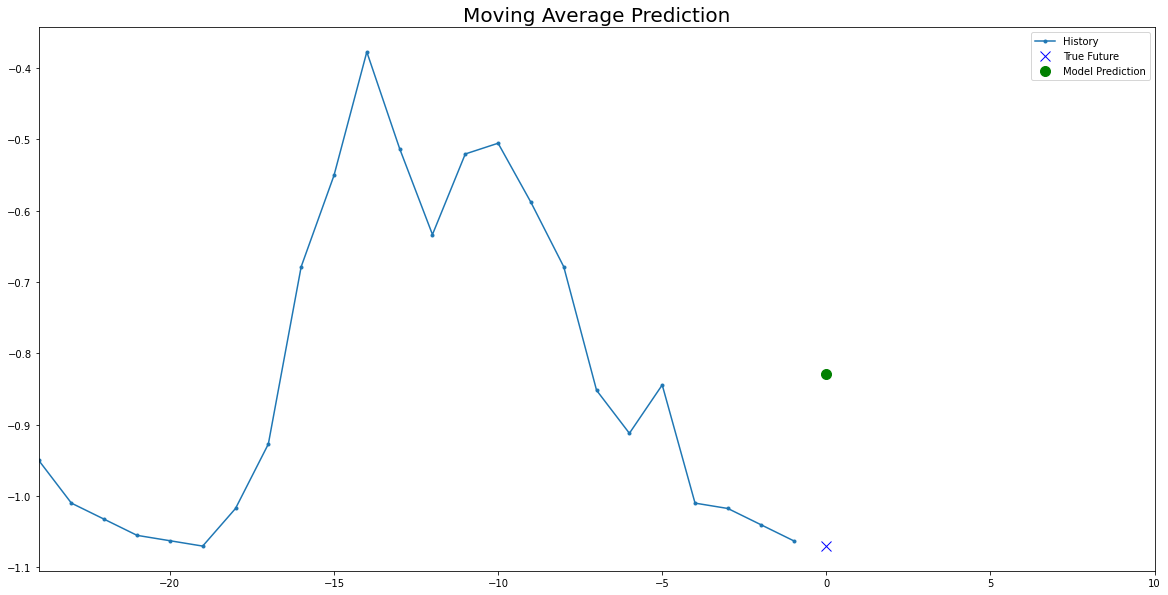

In [ ]:
i = 25
show_plot([x_train_uni[i], y_train_uni[i], mwa(x_train_uni[i])], 0, 'Moving Average Prediction')

In [ ]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

In [ ]:
print(train_univariate)
print(val_univariate)

<RepeatDataset element_spec=(TensorSpec(shape=(None, 24, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<RepeatDataset element_spec=(TensorSpec(shape=(None, 24, 1), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [ ]:
simple_lstm_model = tf.keras.models.Sequential([tf.keras.layers.LSTM(32, input_shape = x_train_uni.shape[-2:]),
                                              tf.keras.layers.Dense(1)])


In [ ]:
simple_lstm_model.compile(optimizer = 'adam', loss = 'mae')


In [ ]:
STEPS_PER_EPOCH = 200
EPOCHS = 10

simple_lstm_model.fit(train_univariate, epochs = EPOCHS, steps_per_epoch = STEPS_PER_EPOCH, validation_data = val_univariate, 
                     validation_steps = 50)

Epoch 1/10
200/200 [==============================] - 8s 28ms/step - loss: 0.4601 - val_loss: 0.6192
Epoch 2/10
200/200 [==============================] - 6s 32ms/step - loss: 0.2833 - val_loss: 0.5002
Epoch 3/10
200/200 [==============================] - 7s 34ms/step - loss: 0.2509 - val_loss: 0.4560
Epoch 4/10
200/200 [==============================] - 6s 29ms/step - loss: 0.2317 - val_loss: 0.4336
Epoch 5/10
200/200 [==============================] - 6s 32ms/step - loss: 0.2180 - val_loss: 0.4266
Epoch 6/10
200/200 [==============================] - 6s 29ms/step - loss: 0.2070 - val_loss: 0.4269
Epoch 7/10
200/200 [==============================] - 5s 27ms/step - loss: 0.1968 - val_loss: 0.4208
Epoch 8/10
200/200 [==============================] - 6s 30ms/step - loss: 0.1866 - val_loss: 0.3996
Epoch 9/10
200/200 [==============================] - 5s 26ms/step - loss: 0.1795 - val_loss: 0.3967
Epoch 10/10
200/200 [==============================] - 6s 31ms/step - loss: 0.1742 - val_lo

8/8 [==============================] - 0s 5ms/step


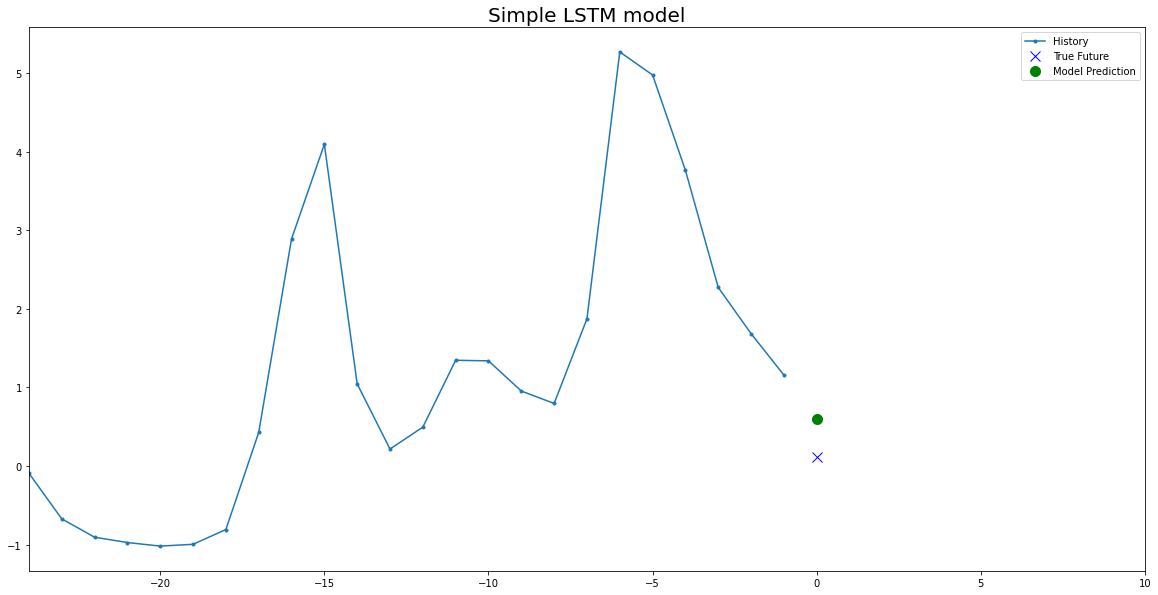

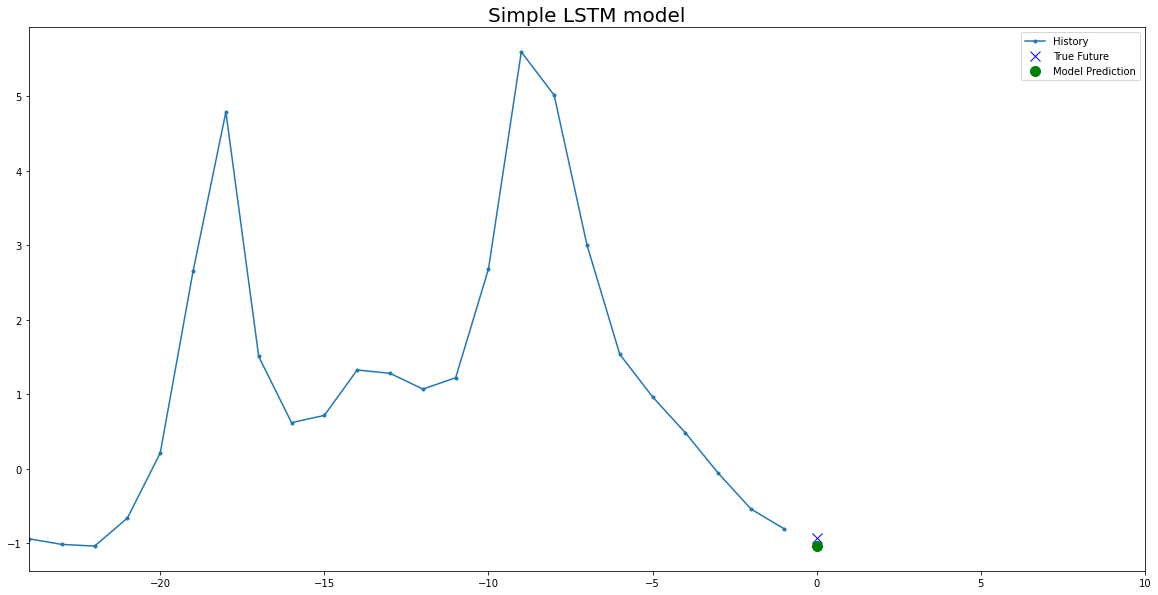

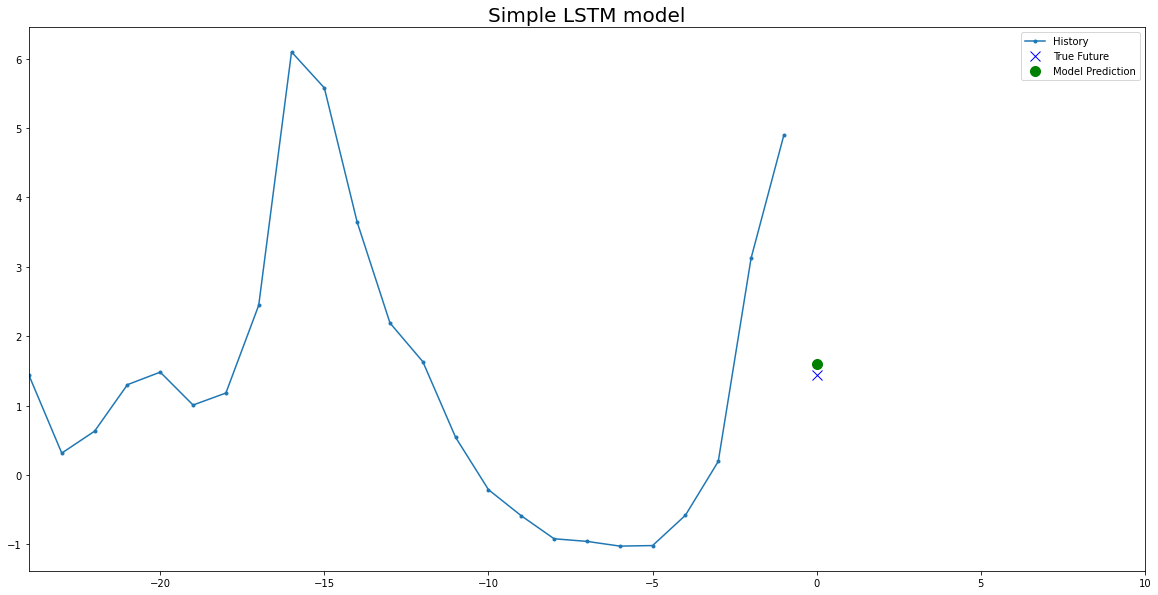

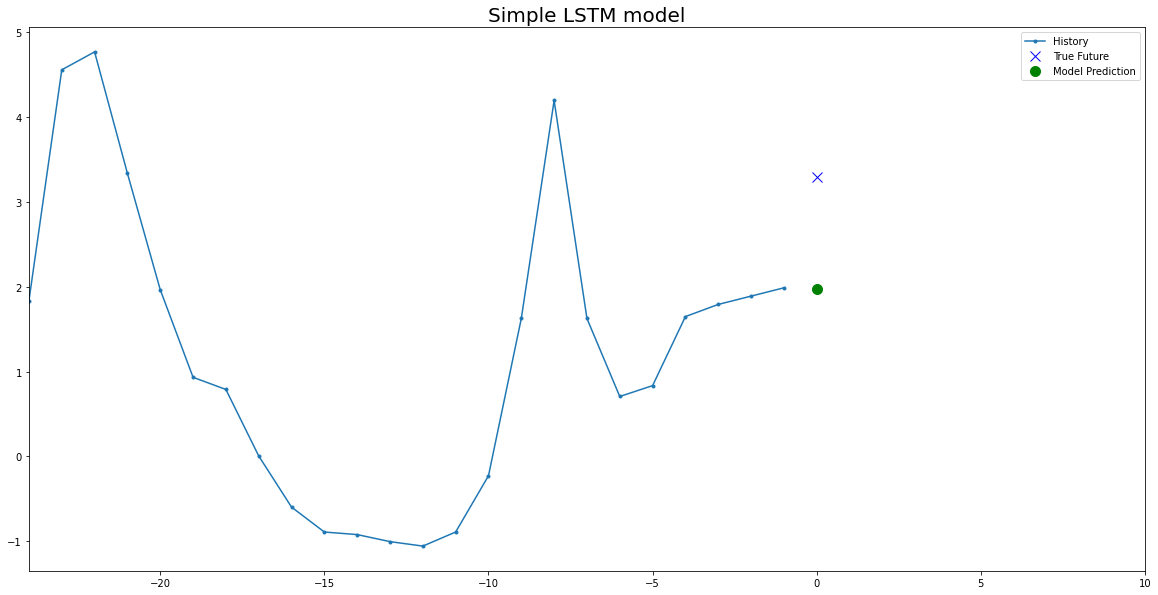

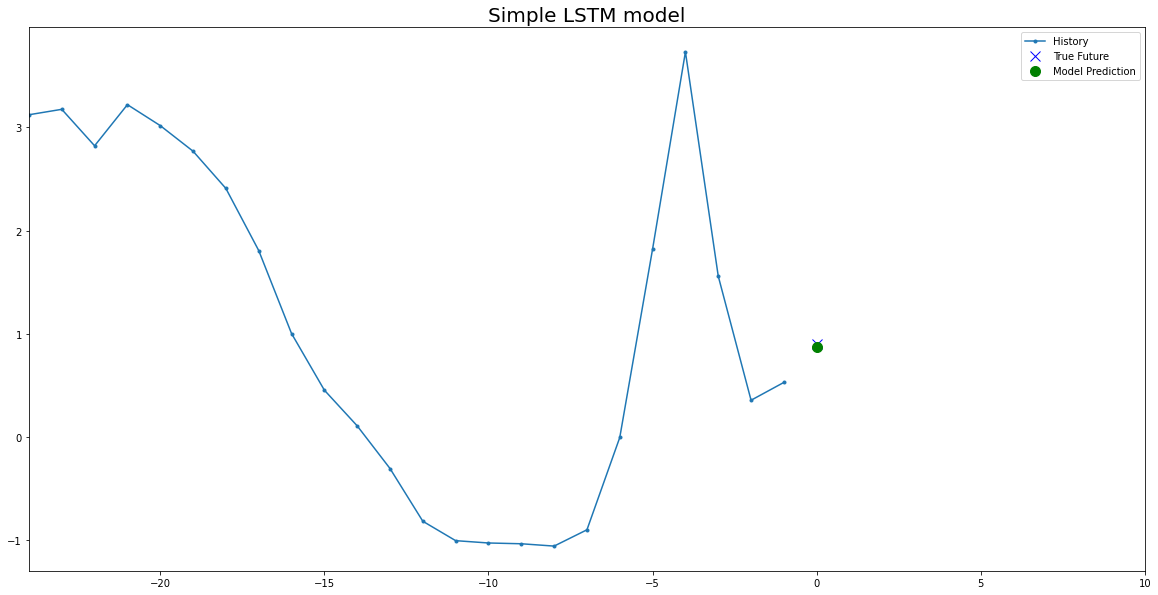

In [ ]:
for x, y in val_univariate.take(5):
    plot = show_plot([x[0].numpy(), y[0].numpy(), simple_lstm_model.predict(x)[0]], 0, 
                    'Simple LSTM model')

In [ ]:
df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,Temperature_converted,Temperature_segments
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,1,0.2552,0.3
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,1,0.2356,0.3
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,1,0.2356,0.3
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,1,0.2552,0.3
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1,0.2552,0.3


In [ ]:
features_considered = ['season', 'holiday', 'weekday', 'workingday', 'hum', 'windspeed', 'temp']
features = df[features_considered]
features.index = df['dteday']
features.head()

,season,holiday,weekday,workingday,hum,windspeed,temp
dteday,,,,,,,
2011-01-01,1,0,6,0,0.81,0.0,0.24
2011-01-01,1,0,6,0,0.80,0.0,0.22
2011-01-01,1,0,6,0,0.80,0.0,0.22
2011-01-01,1,0,6,0,0.75,0.0,0.24
2011-01-01,1,0,6,0,0.75,0.0,0.24


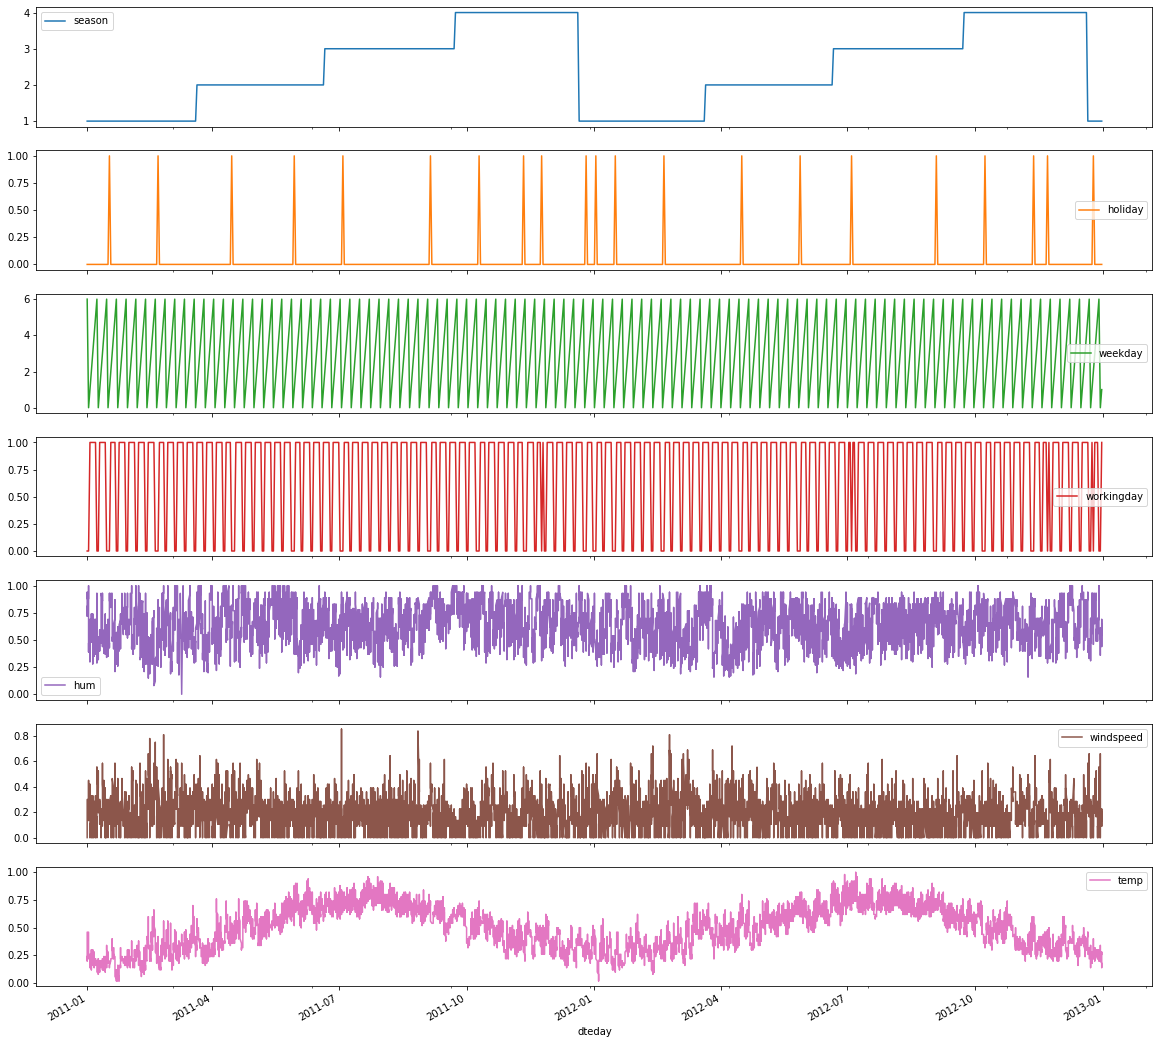

In [ ]:
features.plot(subplots = True, figsize = (20, 20))
plt.show()

In [ ]:
dataset = features.values
data_mean = dataset[: TRAIN_SPLIT].mean(axis = 0)
data_std = dataset[: TRAIN_SPLIT].std(axis = 0)

dataset = (dataset - data_mean) / data_std

In [ ]:
dataset


array([[-1.13686896, -0.17856443,  1.49080573, ...,  0.88824146,
        -1.55227718, -1.11380105],
       [-1.13686896, -0.17856443,  1.49080573, ...,  0.83741597,
        -1.55227718, -1.21403062],
       [-1.13686896, -0.17856443,  1.49080573, ...,  0.83741597,
        -1.55227718, -1.21403062],
       ...,
       [-1.13686896, -0.17856443, -0.99951522, ..., -0.17909377,
        -0.23677596, -1.01357149],
       [-1.13686896, -0.17856443, -0.99951522, ..., -0.38239572,
        -0.47632216, -1.01357149],
       [-1.13686896, -0.17856443, -0.99951522, ...,  0.07503367,
        -0.47632216, -1.01357149]])

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size, target_size, step, single_step = False):
    data = []
    labels = []
    
    start_index = start_index + history_size
    
    if end_index is None:
        end_index = len(dataset) - target_size
     

    for i in range(start_index, end_index):
        indices = range(i - history_size, i, step)
        data.append(dataset[indices])
        
        if single_step:
            labels.append(target[i + target_size])
        else:
            labels.append(target[i: i + target_size])
    return np.array(data), np.array(labels)

In [ ]:
past_history = 24
future_target = 0
STEP = 1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0, TRAIN_SPLIT, past_history,
                                                  future_target, STEP, single_step = True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1], TRAIN_SPLIT, None, past_history,
                                              future_target, STEP, single_step = True)

print(x_train_single.shape)
print(y_train_single.shape)

(9976, 24, 7)
(9976,)


In [ ]:
len([x_train_single, y_train_single])


2

In [ ]:
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

print(train_data_single)
print(val_data_single)

<RepeatDataset element_spec=(TensorSpec(shape=(None, 24, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>
<RepeatDataset element_spec=(TensorSpec(shape=(None, 24, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>


In [ ]:
single_step_model = tf.keras.models.Sequential()

single_step_model.add(tf.keras.layers.LSTM(60, 
                                          input_shape = x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))
single_step_model.compile(optimizer = tf.keras.optimizers.RMSprop(), loss = 'mae')
single_step_history = single_step_model.fit(train_data_single, epochs = EPOCHS, steps_per_epoch = STEPS_PER_EPOCH,
                                           validation_data = val_data_single,
                                           validation_steps = 50)

Epoch 1/10
200/200 [==============================] - 15s 67ms/step - loss: 0.1029 - val_loss: 0.0403
Epoch 2/10
200/200 [==============================] - 12s 60ms/step - loss: 0.0397 - val_loss: 0.0273
Epoch 3/10
200/200 [==============================] - 12s 62ms/step - loss: 0.0337 - val_loss: 0.0270
Epoch 4/10
200/200 [==============================] - 13s 63ms/step - loss: 0.0290 - val_loss: 0.0207
Epoch 5/10
200/200 [==============================] - 10s 52ms/step - loss: 0.0270 - val_loss: 0.0213
Epoch 6/10
200/200 [==============================] - 16s 80ms/step - loss: 0.0268 - val_loss: 0.0190
Epoch 7/10
200/200 [==============================] - 13s 64ms/step - loss: 0.0252 - val_loss: 0.0225
Epoch 8/10
200/200 [==============================] - 11s 57ms/step - loss: 0.0245 - val_loss: 0.0175
Epoch 9/10
200/200 [==============================] - 14s 68ms/step - loss: 0.0236 - val_loss: 0.0201
Epoch 10/10
200/200 [==============================] - 14s 70ms/step - loss: 0.023

In [ ]:
def plot_train_history(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(len(loss))
    plt.figure(figsize = (20, 10))
    plt.plot(epochs, loss, 'b', label = 'Training Loss')
    plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
    plt.title(title, fontsize = 15)
    plt.legend()
    plt.grid()
    
    plt.show()

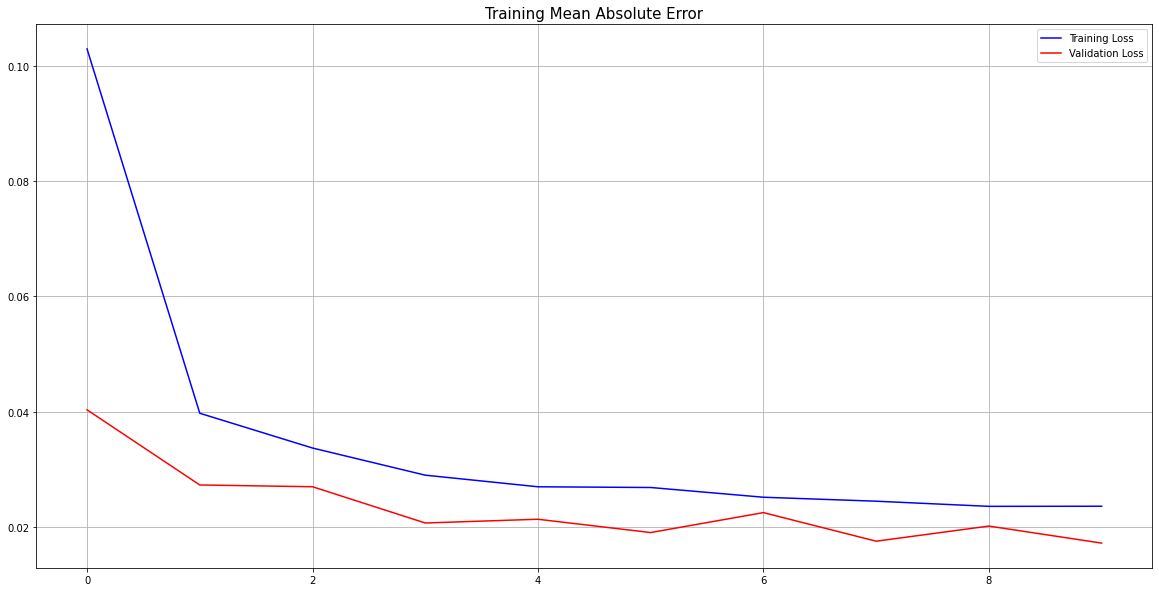

In [ ]:
plot_train_history(single_step_history, 'Training Mean Absolute Error')


In [ ]:
def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'bx', 'go']
    time_steps = create_time_steps(plot_data[0].shape[0])
    
    if delta: 
        future = delta
    else:
        future = 0
        
    plt.figure(figsize = (20, 10))    
    plt.title(title, fontsize = 20)

    for i, x in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize = 10, label = labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label = labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])

Additionally, it's crucial to get rid of additional elements like "immediate" and "dteday," which are objects and can't be represented by number digits, respectively. Therefore, as can be seen below, we are going to eliminate them.

In [ ]:
df.drop(['instant', 'dteday'], axis = 1, inplace = True)


In [ ]:
df.head()


,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,Temperature_converted,Temperature_segments
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16,1,0.2552,0.3
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40,1,0.2356,0.3
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32,1,0.2356,0.3
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13,1,0.2552,0.3
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1,1,0.2552,0.3


# **3. Machine learning Analysis**

It is now time to use machine learning analysis to make sure we receive the most accurate forecasts for the demand for bikes. The initial step would be to distinguish between the target variable and the input features by separating the X values from the y values. In order to generate the best predictions from the machine learning models, we therefore employ X and y as these variables.

In [ ]:
X = df.drop(['cnt'], axis = 1).values
y = df['cnt'].values

In [ ]:
X[0: 5]


array([[1.    , 0.    , 1.    , 0.    , 0.    , 6.    , 0.    , 1.    ,
        0.24  , 0.2879, 0.81  , 0.    , 1.    , 0.2552, 0.3   ],
       [1.    , 0.    , 1.    , 1.    , 0.    , 6.    , 0.    , 1.    ,
        0.22  , 0.2727, 0.8   , 0.    , 1.    , 0.2356, 0.3   ],
       [1.    , 0.    , 1.    , 2.    , 0.    , 6.    , 0.    , 1.    ,
        0.22  , 0.2727, 0.8   , 0.    , 1.    , 0.2356, 0.3   ],
       [1.    , 0.    , 1.    , 3.    , 0.    , 6.    , 0.    , 1.    ,
        0.24  , 0.2879, 0.75  , 0.    , 1.    , 0.2552, 0.3   ],
       [1.    , 0.    , 1.    , 4.    , 0.    , 6.    , 0.    , 1.    ,
        0.24  , 0.2879, 0.75  , 0.    , 1.    , 0.2552, 0.3   ]])

To be able to adjust the hyperparameters for various machine learning models and guarantee that we obtain the best predictions for those models, it is crucial to divide the data into training and cross-validation groups. It's critical to obtain good hyperparameter settings that guarantee that various machine learning models each perform favorably on the test set.

In [ ]:
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size = 0.3, random_state = 101)


Taking a look at the dataframe, we see that there are about 12165 rows and 15 features that we would be finally working with on the training input features.



In [ ]:
X_train.shape


(12165, 15)

In order to make the weights that are optimized as limited as possible rather than having a varied weight range for distinct features, it is also crucial to feature-trait the columns and ensure that the values of the input features fall between 0 and 1. We employ a scaler called "MinMaxScaler" to take care of these responsibilities.

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_cv = scaler.transform(X_cv)

In [ ]:
X_train.shape


(12165, 15)

## **3.1 Deep Neural Network**

The deep neural network is the machine learning model that we would employ initially. There are several hidden units, and we have decided to make the value of activation "relu" in each case. Before fitting the machine learning model for predictions in the cross-validation data, we chose a variety of optimizers and metrics.

In [ ]:
model = Sequential()
model.add(Dense(100, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(25, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(5, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'MSE', metrics = ['MSE', 'MAE'])


We would train the machine learning model for 200 iterations so that it would optimize the weights and ensure that it performs well on the cross-validation data respectively.

In [ ]:
model.fit(X_train, y_train, epochs = 200, verbose = 1, validation_data = (X_cv, y_cv))


Epoch 1/200
381/381 [==============================] - 3s 6ms/step - loss: 31642.1953 - MSE: 31642.1953 - MAE: 131.0155 - val_loss: 20826.2715 - val_MSE: 20826.2715 - val_MAE: 113.0376
Epoch 2/200
381/381 [==============================] - 2s 4ms/step - loss: 20060.0469 - MSE: 20060.0469 - MAE: 104.0495 - val_loss: 19188.1191 - val_MSE: 19188.1191 - val_MAE: 101.6681
Epoch 3/200
381/381 [==============================] - 1s 3ms/step - loss: 18997.4102 - MSE: 18997.4102 - MAE: 100.1036 - val_loss: 18214.3574 - val_MSE: 18214.3574 - val_MAE: 99.3080
Epoch 4/200
381/381 [==============================] - 1s 3ms/step - loss: 17682.0117 - MSE: 17682.0117 - MAE: 95.3793 - val_loss: 16544.5977 - val_MSE: 16544.5977 - val_MAE: 91.7524
Epoch 5/200
381/381 [==============================] - 1s 3ms/step - loss: 15951.6484 - MSE: 15951.6484 - MAE: 90.1740 - val_loss: 14943.8467 - val_MSE: 14943.8467 - val_MAE: 88.5533
Epoch 6/200
381/381 [==============================] - 1s 3ms/step - loss: 14503

# **Scatterplot between Y_test and Y_predictions**
Looking at the scatterplot, we can see that the predictions and actual bike demand are rather close to one another. We are evaluating the machine learning model's performance on the test set using the cross-validation output.

163/163 [==============================] - 1s 3ms/step


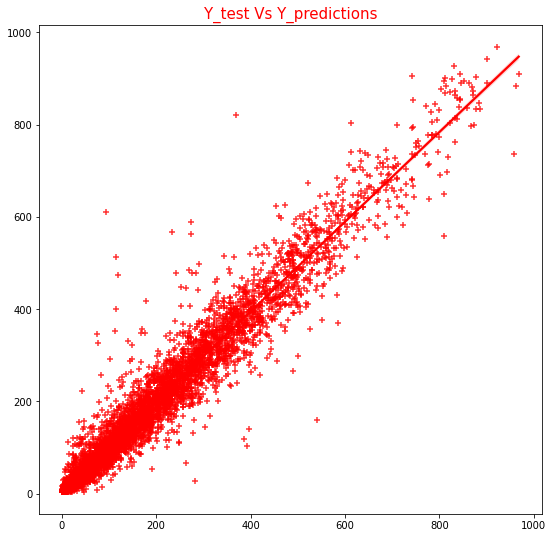

In [ ]:
plt.figure(figsize = (9, 9))
sns.regplot(y_cv, model.predict(X_cv), marker = '+', color = 'red')
plt.title('Y_test Vs Y_predictions', color = 'red', fontsize = 15)
plt.show()

## **3.2 K-Nearest Neighbors**
To acquire the best neighbors for the k-nearest neighbors algorithm, we would use hyperparameter tuning. While using KNN, we must choose the number of nearest neighbors, and the algorithm will take that number into account when making predictions. The algorithm would be more biased in favor of the majority class the higher the number of nearest neighbors because it would base decisions on the number of nearest neighbors. To guarantee that we acquire the best predictions from the cross-validation data, we must choose the appropriate hyperparameter. The iteration and various values for the hyperparameters are provided below so that the values may be fitted into the training set and we can obtain the values from the cross-validation data.

In [ ]:
model = KNeighborsRegressor()
mean_squared_error_list = []
mean_absolute_error_list = []
roc_auc_score_list = []
K_nearest_neighbors = [2, 3, 5, 8, 10, 11, 15, 20]
for i in K_nearest_neighbors:
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_cv)
    mean_squared_error_list.append(mean_squared_error(y_predict, y_cv))
    mean_absolute_error_list.append(mean_absolute_error(y_predict, y_cv))
#Creating a dictionary of the dataframe so that we would be able to understand the different errors present in the output respectively.



In [ ]:
knn_dictionary = {'K Nearest Neighbors': K_nearest_neighbors, 'Mean Squared Error': mean_squared_error_list, 'Mean Absolute Error': mean_absolute_error_list}


In [ ]:
knn_dataframe = pd.DataFrame(knn_dictionary)


For different values of the nearest neighbors, we get different mean squared error and mean absolute errors respectively.



In [ ]:
knn_dataframe


,K Nearest Neighbors,Mean Squared Error,Mean Absolute Error
0,2,12945.821634,72.429613
1,3,12988.911669,74.553062
2,5,12878.514538,77.040967
3,8,13143.848401,80.212936
4,10,13326.131830,81.903759
5,11,13415.819808,82.686892
6,15,13906.935362,85.300141
7,20,14263.887532,87.385021


# **Lineplot between Neighbors and the Mean Squared Error**

The figure below shows that there is an increase in the error with an increase in the value of K. As can be seen, K should be set at 5. Since that was the best K value out of the K values we evaluated during the cross-validation stage of our machine learning problem, we would use that value in our predictions.

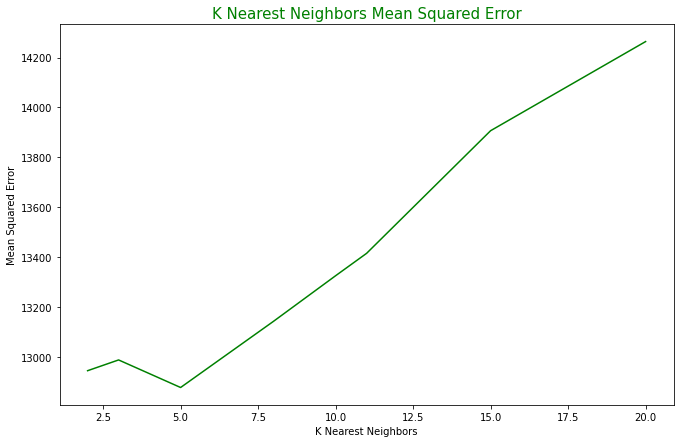

In [ ]:
plt.figure(figsize = (11, 7))
sns.lineplot(x = 'K Nearest Neighbors', y = 'Mean Squared Error', data = knn_dataframe, color = 'green')
plt.title("K Nearest Neighbors Mean Squared Error", fontsize = 15, color = 'green')
plt.show()

# **Lineplot between Neighbors and Mean Absolute Error**

This is in line with an upward trend where the mean absolute error increases in proportion to rising K values. As a result, the mean absolute error increases significantly along with the value of K. K should be set to 2, as this is where the mistake is least. We'll continue to use K as its optimum value of 5, since Mean Absolute Error is a crucial indicator that helps us determine whether predictions are accurate.

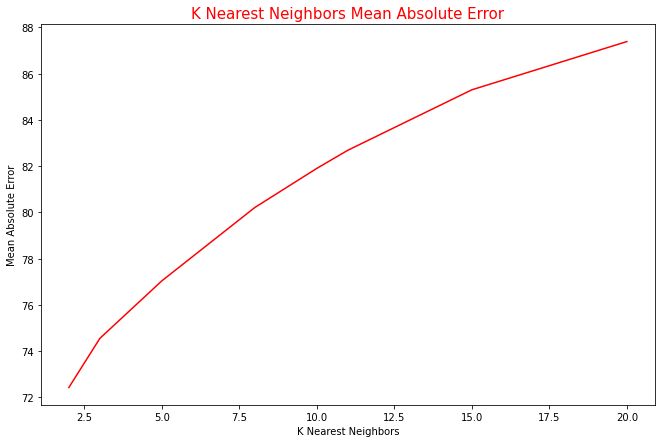

In [ ]:
plt.figure(figsize = (11, 7))
sns.lineplot(x = 'K Nearest Neighbors', y = 'Mean Absolute Error', data = knn_dataframe, color = 'red')
plt.title("K Nearest Neighbors Mean Absolute Error", fontsize = 15, color = 'red')
plt.show()

In [ ]:
best_neighbor_index = np.argmin(mean_squared_error_list)


In [ ]:
best_neighbor = K_nearest_neighbors[best_neighbor_index]


# **Scatterplot between Y_test and Y_predictions**

Since the values of y test and y predictions do not fit in a straight line as displayed, we can observe that the K Nearest Regressor does not perform as well as it should. As a result, given that the values between y test and y predictions are quite dispersed, we can say that K Nearest Regressor is a good machine learning model for our task.

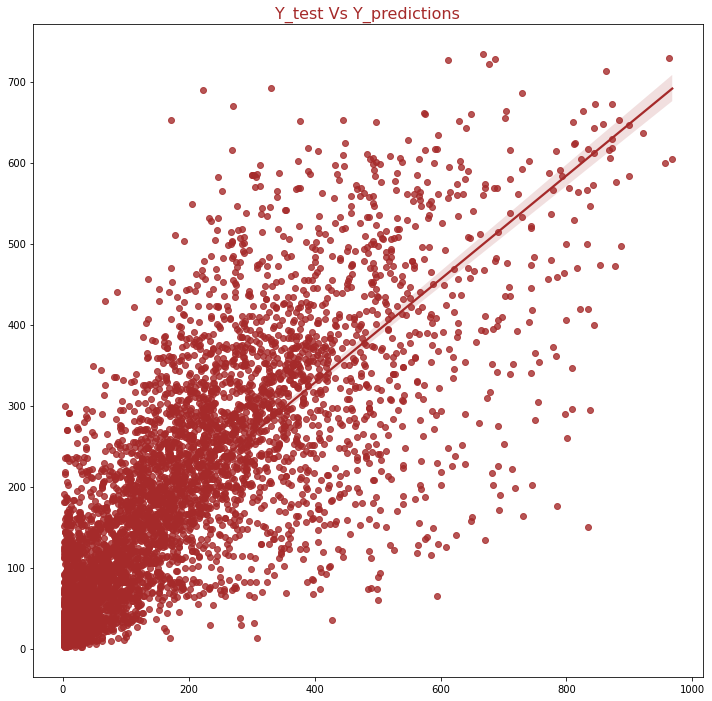

In [ ]:
model = KNeighborsRegressor(n_neighbors = best_neighbor)
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)
plt.figure(figsize = (12, 12))
sns.regplot(y_cv, y_predict, color = 'brown')
plt.title('Y_test Vs Y_predictions', fontsize = 16, color = 'brown')
plt.show()

## **3.3 PLS Regression**

Another regression type that gives us the ability to choose the number of components—a hyperparameter—is this one. We would adjust the hyperparameter, test several values, and determine which ones would yield the most accurate forecasts.

In [ ]:
n_components_list = [2, 3, 5, 7, 10]
mean_squared_error_list = []
mean_absolute_error_list = []
for i in n_components_list:
    model = PLSRegression(n_components = i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_cv)
    mean_squared_error_list.append(mean_squared_error(y_predict, y_cv))
    mean_absolute_error_list.append(mean_absolute_error(y_predict, y_cv))

In [ ]:
pls_regression_dict = {'Number of Components': n_components_list, 'Mean Absolute Error': mean_absolute_error_list,
                      'Mean Squared Error': mean_squared_error_list}

In [ ]:
pls_regression_dataframe = pd.DataFrame(pls_regression_dict)


In [ ]:
pls_regression_dataframe


,Number of Components,Mean Absolute Error,Mean Squared Error
0,2,106.391810,20255.890519
1,3,106.132008,20005.275451
2,5,105.580811,19935.640591
3,7,105.685001,19937.672480
4,10,105.694856,19928.941616


In [ ]:
def plot_function(dataframe):
    fig, axes = plt.subplots(1, 2, figsize = (15, 5))
    sns.lineplot(ax = axes[0], x = dataframe.columns[0], y = 'Mean Absolute Error', data = dataframe)
    axes[0].set_title('Number of Components Vs Mean Absolute Error', fontsize = 15)
    sns.lineplot(ax = axes[1], x = dataframe.columns[0], y = 'Mean Squared Error', data = dataframe)
    axes[1].set_title('Number of Components Vs Mean Squared Error', fontsize = 15)
    fig.tight_layout()

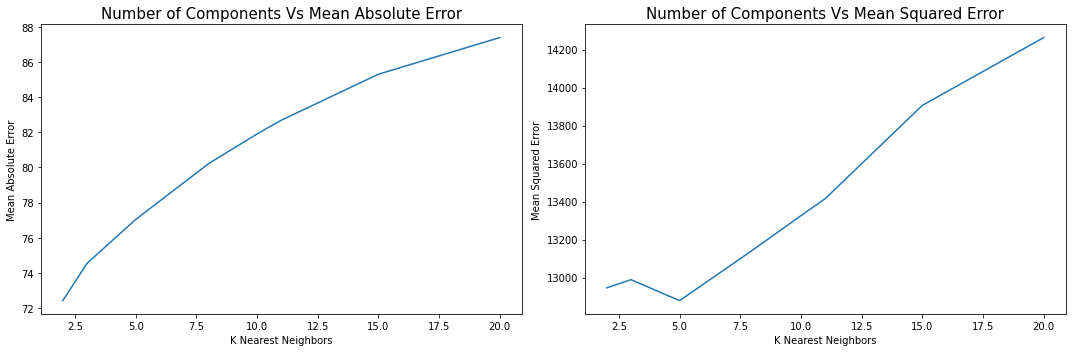

In [ ]:
plot_function(knn_dataframe)


# **Plots for PLS Regression**

The mean absolute error plot and the mean squared error plot are what we will now be examining, respectively. As can be seen, 5 is the ideal number of components because the mean absolute error is at its lowest and the mean squared error is at its lowest. We choose the optimal hyperparameter so that the error is low for both the mean squared error and the mean absolute error, even though there are other values of components where the mean squared error is lower.

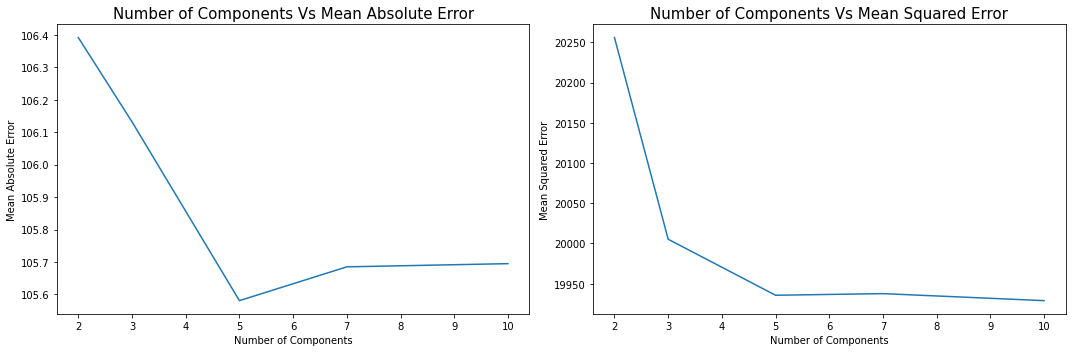

In [ ]:
plot_function(pls_regression_dataframe)


## **3.4 Decision Tree Regressor**
Using Decision Tree Regressor, we have quite a few hyperparameters but we would be working with just one hyperparameter which is the depth of the tree. Let us choose different values for the max depth and see how the values influence different machine learning outcomes respectively.

In [ ]:
max_depth_list = [10, 15, 16, 17, 18, 20, 25]
mean_absolute_error_list = []
mean_squared_error_list = []
for i in max_depth_list:
    model = DecisionTreeRegressor(max_depth = i)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_cv)
    mean_absolute_error_list.append(mean_absolute_error(y_predict, y_cv))
    mean_squared_error_list.append(mean_squared_error(y_predict, y_cv))
decision_tree_dict = {'Max Depth': max_depth_list, 'Mean Absolute Error': mean_absolute_error_list,
                     'Mean Squared Error': mean_squared_error_list}
decision_tree_dataframe = pd.DataFrame(decision_tree_dict)

# **Decision Tree Regressor**

We would examine various decision tree regressor max depth settings and observe how the values would alter in accordance with various values. Additionally, we can observe that for the mean squared error and mean absolute error, respectively, the value of max depth is optimum when it is 15 correspondingly. Therefore, 15 is the best choice for the maximum depth because it has the lowest mean squared error and mean absolute error.

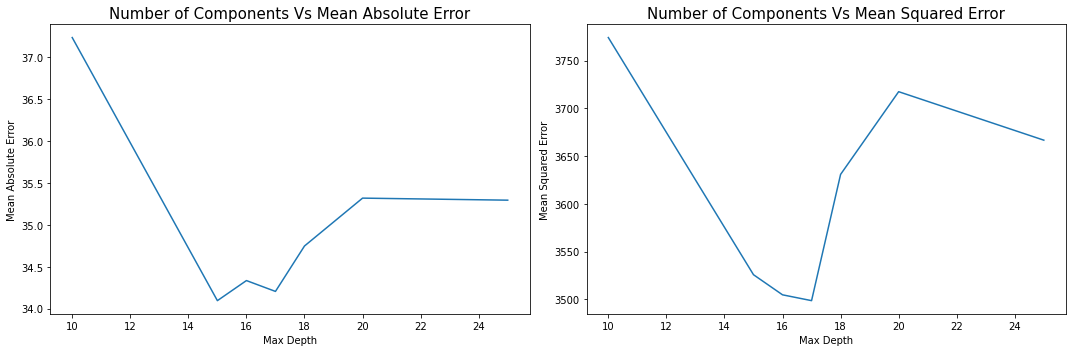

In [ ]:
plot_function(decision_tree_dataframe)


In [ ]:
best_max_depth_index = np.argmin(mean_absolute_error_list)
best_max_depth = max_depth_list[best_max_depth_index]

# Y_test and Y_predictions
The decision tree regressor was able to produce very accurate predictions on the test set, as can be seen from the scatterplot below. Both the forecasts and the actual test output values are reasonably close to one another. As a result, the outcome might be predicted using a decision tree regressor. However, let's also examine the performance of the other machine learning models on the test set.

In [1]:
model = DecisionTreeRegressor(max_depth = best_max_depth)
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)
plt.figure(figsize = (9, 9))
sns.regplot(y_predict, y_cv, marker = '*', color = 'blue')
plt.title('Y_test Vs Y_predictions', fontsize = 16, color = 'blue')
plt.show()

NameError: ignored

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor


## ** 3.5 Gradient Boosting Regressor**

Use the most popular machine learning model for predictions at this time. We would employ the gradient boosting decision tree model to guarantee that we would obtain the most accurate forecasts. We can see that there are various estimators, each of which is a hyperparameter that needs to be tuned in order to obtain the mean squared error and mean absolute error with the lowest errors possible.


In [ ]:
n_estimators_list = [25, 50, 100, 150, 200, 400, 1000]
mean_squared_error_list = []
mean_absolute_error_list = []
for i in n_estimators_list:
    model = GradientBoostingRegressor(n_estimators = i, max_depth = 10)
    model.fit(X_train, y_train)
    y_predict = model.predict(X_cv)
    mean_squared_error_list.append(mean_squared_error(y_cv, y_predict))
    mean_absolute_error_list.append(mean_absolute_error(y_cv, y_predict))
gradient_boosting_regressor_dict = {"Number of Estimators": n_estimators_list, "Mean Absolute Error": mean_absolute_error_list,
                                   "Mean Squared Error": mean_squared_error_list}
gradient_boosting_regressor_dataframe = pd.DataFrame(gradient_boosting_regressor_dict)   

# Plots of Mean Absolute Error and Mean Squared Error
The graph below clearly illustrates how the machine learning model advances as the number of estimators rises. As a result, we would train the model with various numbers of estimators to obtain the lowest error. To guarantee that we obtain the optimal machine learning models for prediction, we will be learning and applying various numbers of components.

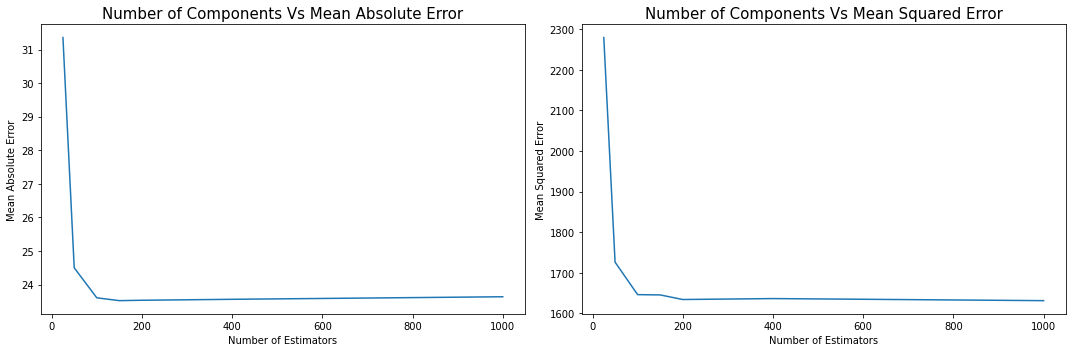

In [ ]:
plot_function(gradient_boosting_regressor_dataframe)


In [ ]:
gradient_boosting_regressor_dataframe


,Number of Estimators,Mean Absolute Error,Mean Squared Error
0,25,31.356319,2279.370772
1,50,24.500725,1726.039417
2,100,23.607499,1645.973775
3,150,23.522809,1645.277569
4,200,23.534470,1633.957103
5,400,23.562644,1636.249500
6,1000,23.638698,1631.169807


In [ ]:
n_estimators_index = np.argmin(mean_squared_error_list)
best_n_estimators = n_estimators_list[n_estimators_index]

In [ ]:
model = GradientBoostingRegressor(n_estimators = best_n_estimators, max_depth = 10)
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)

# Scatterplot between Y_test and Y_predictions
As you can see here, a very straight line can be made between the forecasts and the actual test results, respectively. In addition, we observe that the model is outperforming other machine learning models fairly well. Due to its positive results on the cross-validation set, we would use this machine learning model for deployment.

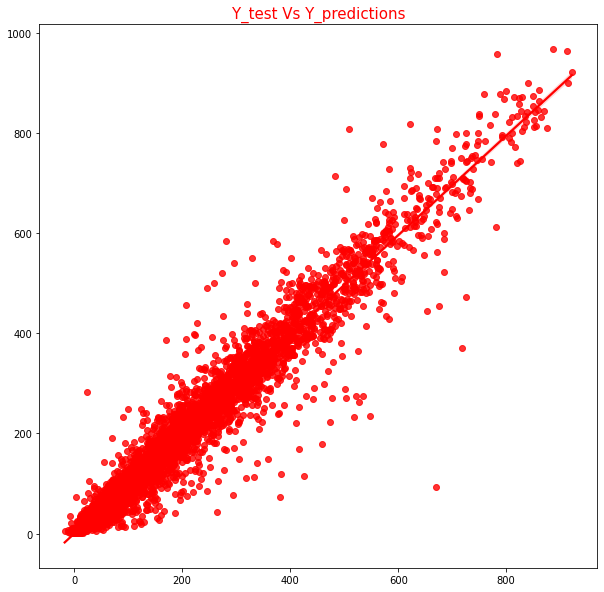

In [ ]:
plt.figure(figsize = (10, 10))
sns.regplot(y_predict, y_cv, marker = 'o', color = 'red')
plt.title("Y_test Vs Y_predictions", fontsize = 15, color = 'red')
plt.show()

## **3.6 Logistic Regression**
Now let us use the logistic regression model and see how well the model does. As can be seen from the plot below, it is not performing as close to the other machine learning models respectively. Therefore, it is better to use other machine learning models for prediction respectively.

The mean squared error of the linear regression model is 19925.131765106464
The mean absolute error of the linear regression model is 105.67503192823504


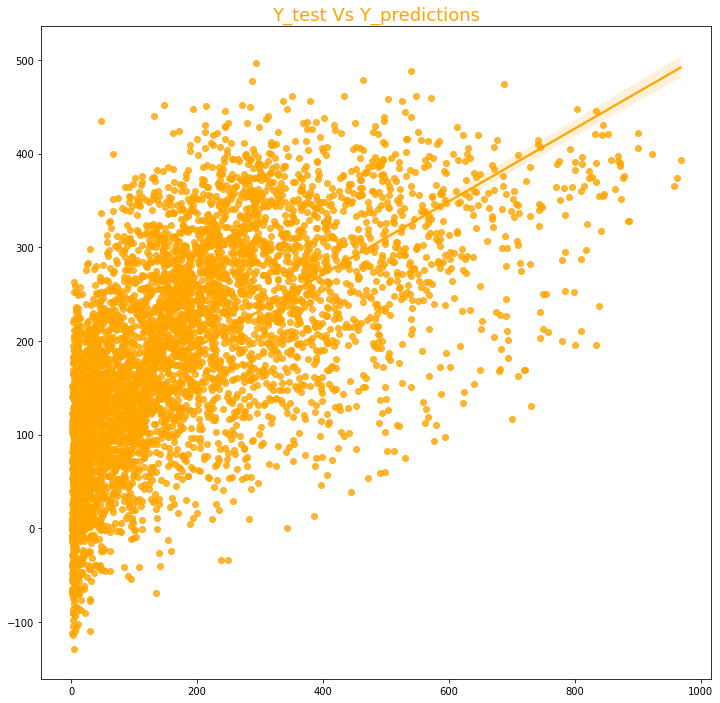

In [ ]:
mean_squared_error_list = []
mean_absolute_error_list = []
model = LinearRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_cv)
mean_squared_error_list.append(mean_squared_error(y_predict, y_cv))
mean_absolute_error_list.append(mean_absolute_error(y_predict, y_cv))
print(f"The mean squared error of the linear regression model is {mean_squared_error_list[0]}")
print(f"The mean absolute error of the linear regression model is {mean_absolute_error_list[0]}")
plt.figure(figsize = (12, 12))
sns.regplot(y_cv, y_predict, color = 'orange')
plt.title("Y_test Vs Y_predictions", fontsize = 18, color = 'orange')
plt.show()

# **4. Conclusion**


1. In the cross-validation data, we could see that the gradient boosting approach outperformed the other machine learning models.
Although gradient boosting tree was the best machine learning model for predicting the bike demand, deep neural networks also scored well.
2.  Scatterplots were employed to obtain the output for both the forecasts and the actual test results.
3. The values were changed to range between 0 and 1, accordingly.
4. An excellent grasp of various features and how they affect the results for various datasets and distributions can be gained through exploratory data analysis.

